In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Завантаження попередньо підготовлених датасетів**

In [9]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'

In [6]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [7]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [11]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [12]:
df_profiles.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
fd84693afdb35030ebddc69a43d273c5b90e0c2a,0.519743,0.718578,0.424362,0.823145,0.695652,0.067945,0.147541,0.176596,0.242006,0.492968,0.529671,0.788142


# **Оберемо рандомного користувача**

In [39]:
random_user = df_profiles.sample()

In [40]:
random_user_id = random_user.index[0]
random_user_id

'bc29b378a4751d9b6cc7737207584abc2c24c9d9'

In [41]:
filtered_user_df = df_users[df_users['user_id'] == random_user_id]
filtered_user_df.shape

(144, 4)

In [42]:
filtered_user_df['track_id'].nunique()

144

# **Склеїмо датасет з характеристиками треків**

In [43]:
filtered_user_df = filtered_user_df.merge(df_features, how='inner', on='track_id')

In [45]:
filtered_user_df.sample()

,track_id,user_id,playcount,playcount_norm,name,artist,spotify_id,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
65,TRDHBPQ128F425EA1E,bc29b378a4751d9b6cc7737207584abc2c24c9d9,1,0.0,Bleeding Love,Leona Lewis,00rjh2BKthoILRIEV7lJ65,2017,262466,0.635,...,0.454545,0.849455,1,0.0372,0.192,0.0,0.144,0.217,0.435426,0.8


In [47]:
filtered_user_df[filtered_user_df.isna().any(axis=1)]

,track_id,user_id,playcount,playcount_norm,name,artist,spotify_id,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


# **Накладемо графіки треків один на один**

In [53]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

In [83]:
def plot_overlay_recommendations(data:pd.DataFrame, features:list, user_profile:pd.DataFrame, limit:int = 5):
    num_features = len(features)
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
    angles = np.append(angles, angles[0])

    values_rs = user_profile[features].values.flatten()
    values_rs = np.append(values_rs, values_rs[0])

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})
    fig.suptitle(f'Overlayed All Tracks User Listened To vs User Profile\n{user_profile.index[0]}\nlistened to {data.shape[0]} tracks', fontsize=16, fontweight='bold')

    for i, (index, rec) in enumerate(data.head(limit).iterrows()):
        values = rec[features].values
        values = np.append(values, values[0])

        ax.plot(angles, values, linewidth=2, label=f'{rec["name"]} - {rec["artist"]}', color='maroon')
        ax.fill(angles, values, alpha=0.15, color='maroon')

    ax.plot(angles, values_rs, color='gold', linewidth=3, label='User Profile')
    ax.fill(angles, values_rs, color='gold', alpha=0.2)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=9)
    ax.set_yticklabels([])
    # ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.tight_layout()
    plt.show()

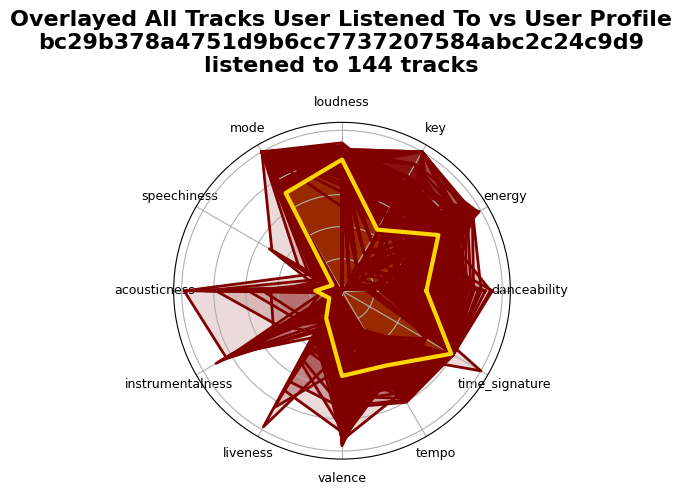

In [84]:
plot_overlay_recommendations(data=filtered_user_df,
                             features=features,
                             user_profile=random_user,
                             limit=filtered_user_df.shape[0])

In [85]:
def plot_overlay_recommendations_of_random_user(df_user_profiles:pd.DataFrame, 
                                                df_users:pd.DataFrame, 
                                                df_features:pd.DataFrame, 
                                                features:list, limit:int = 0):
    random_user = df_user_profiles.sample()
    random_user_id = random_user.index[0]
    random_user_all_tracks = df_users[df_users['user_id'] == random_user_id]

    df_final = random_user_all_tracks.merge(df_features, on='track_id', how='inner')
    plot_overlay_recommendations(
        data=df_final,
        features=features,
        user_profile=random_user,
        limit = limit if limit != 0 else df_final.shape[0]
    )

# **RANDOM USER**

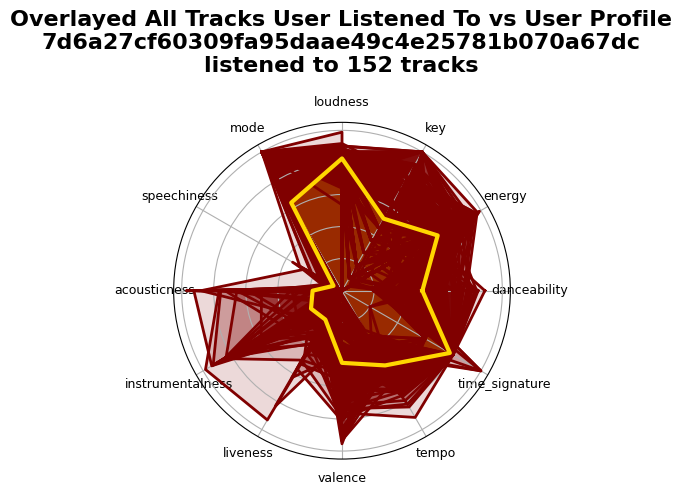

In [87]:
plot_overlay_recommendations_of_random_user(df_user_profiles=df_profiles, 
                                                df_users=df_users, 
                                                df_features=df_features, 
                                                features=features)